# ML assignment 3
<a href="#Problem-1">Problem1</a>
<a href="#Problem-2">Problem2</a>
<a href="#Problem-3">Problem3</a>
<a href="#Problem-4">Problem4</a>

## Problem 1

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

df = pd.read_csv('Concrete_Data.csv')

# rename columns
df.rename(columns=lambda x: x.split('(')[0].strip(), inplace=True)

In [2]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe(percentiles=[])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.input=df.iloc[:,0:-1]
df.input.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
df.output=df.iloc[:,-1]
df.output.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [6]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


## Standardization 

In [7]:
from sklearn.preprocessing import StandardScaler
#df = StandardScaler().fit_transform(df)
#df.assign()

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Visualiaztion for 9 attributes

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#g1 = sns.pairplot(df)
#g1.savefig("pairplot.png")

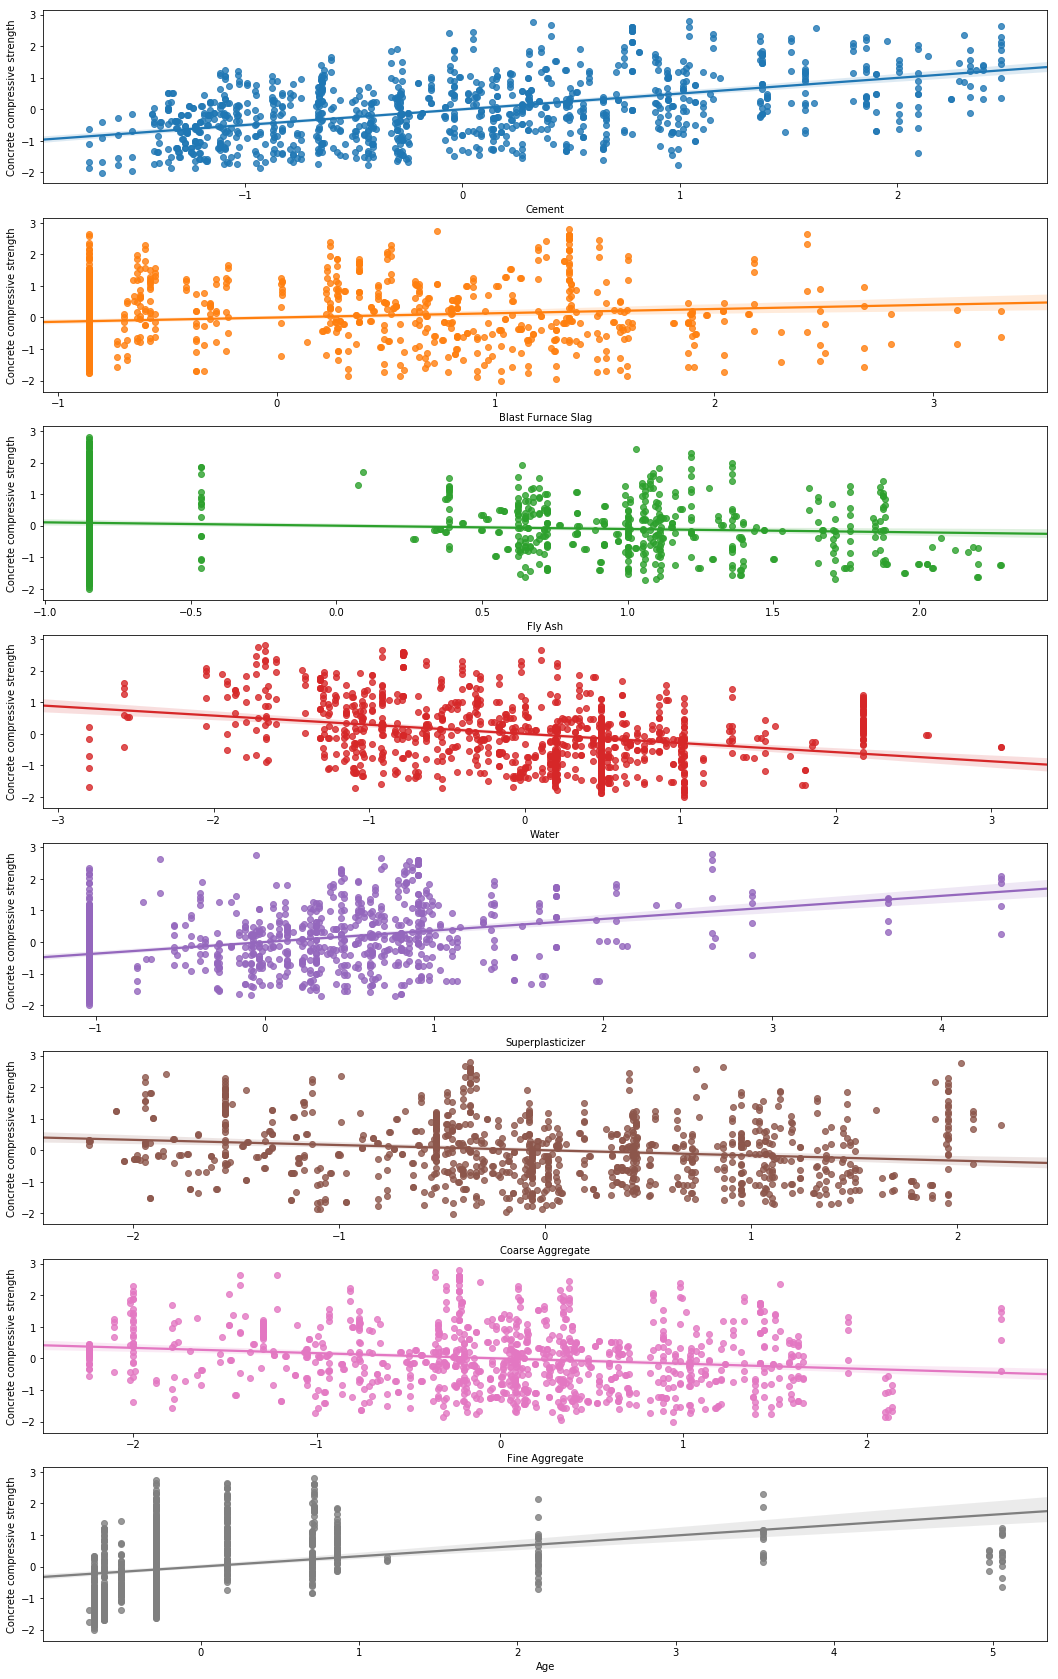

In [10]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])

plt.show()

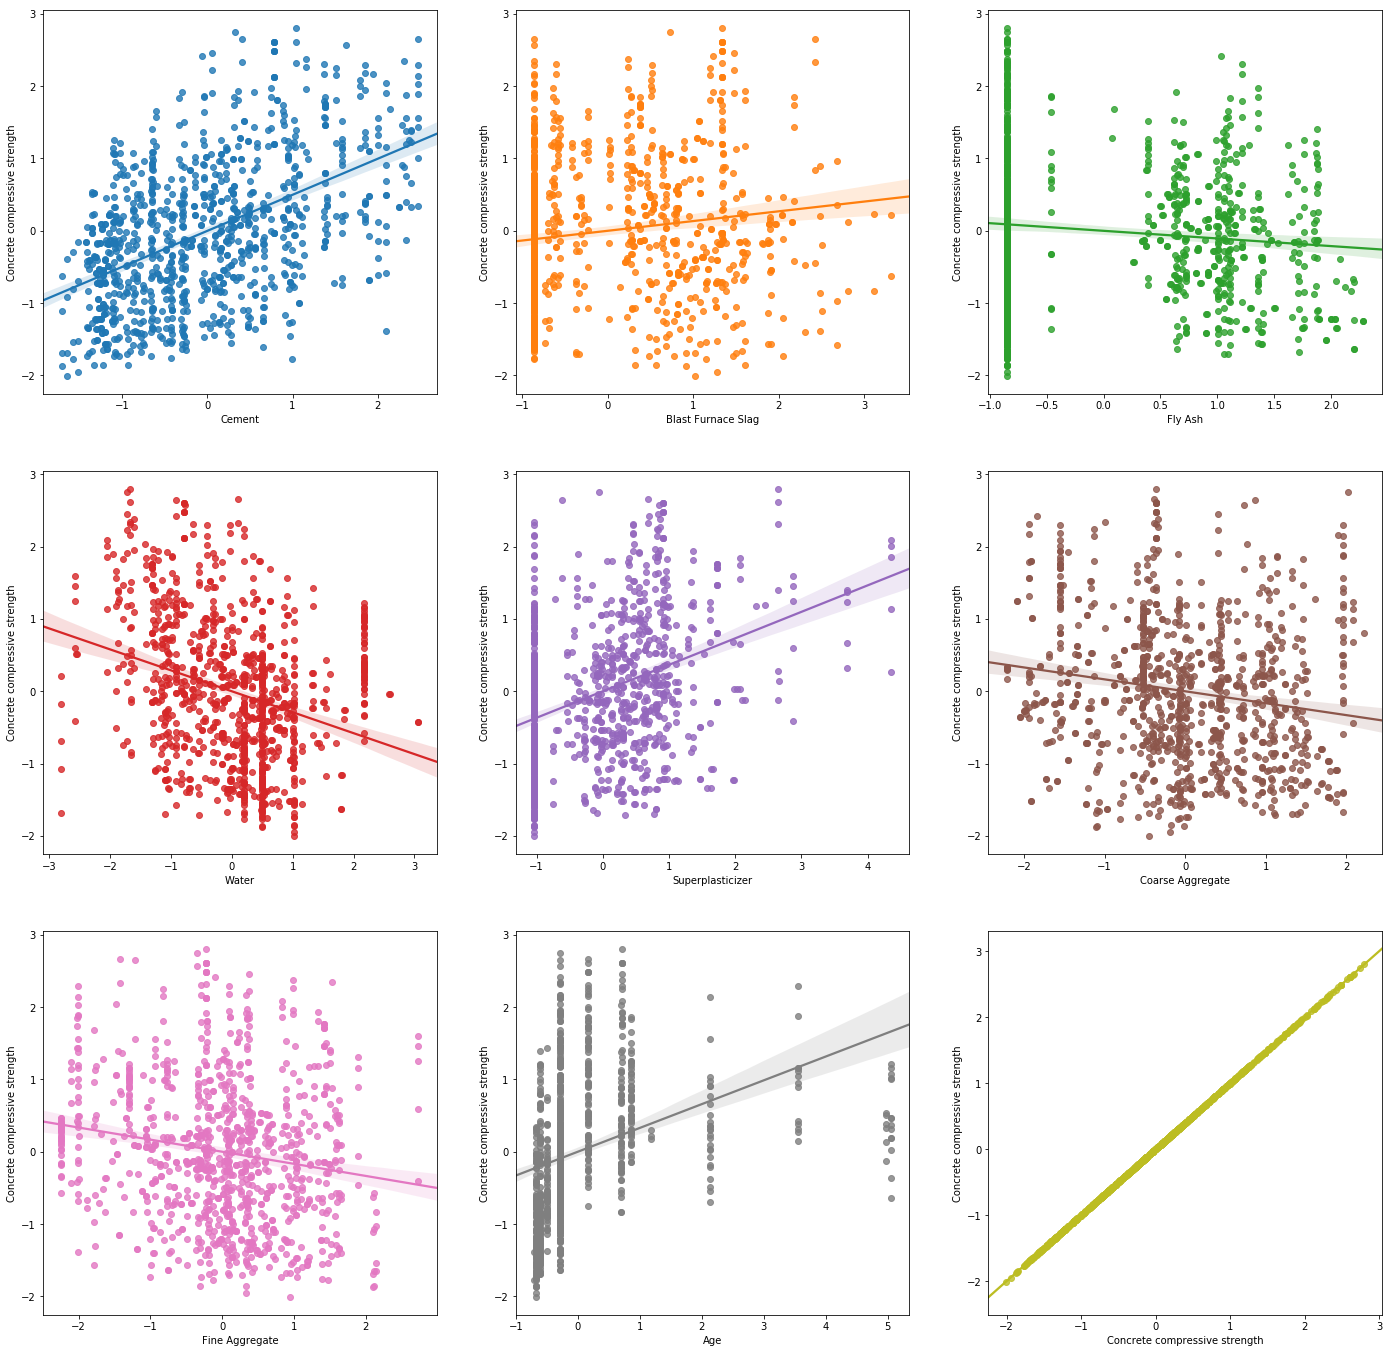

In [11]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

plt.show()

## Data Selection & Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 8

X, y = df.iloc[:, 0:inputNum], df.iloc[:, inputNum:inputNum+1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Simple linear regression
* iteratively train linear model with each attribute

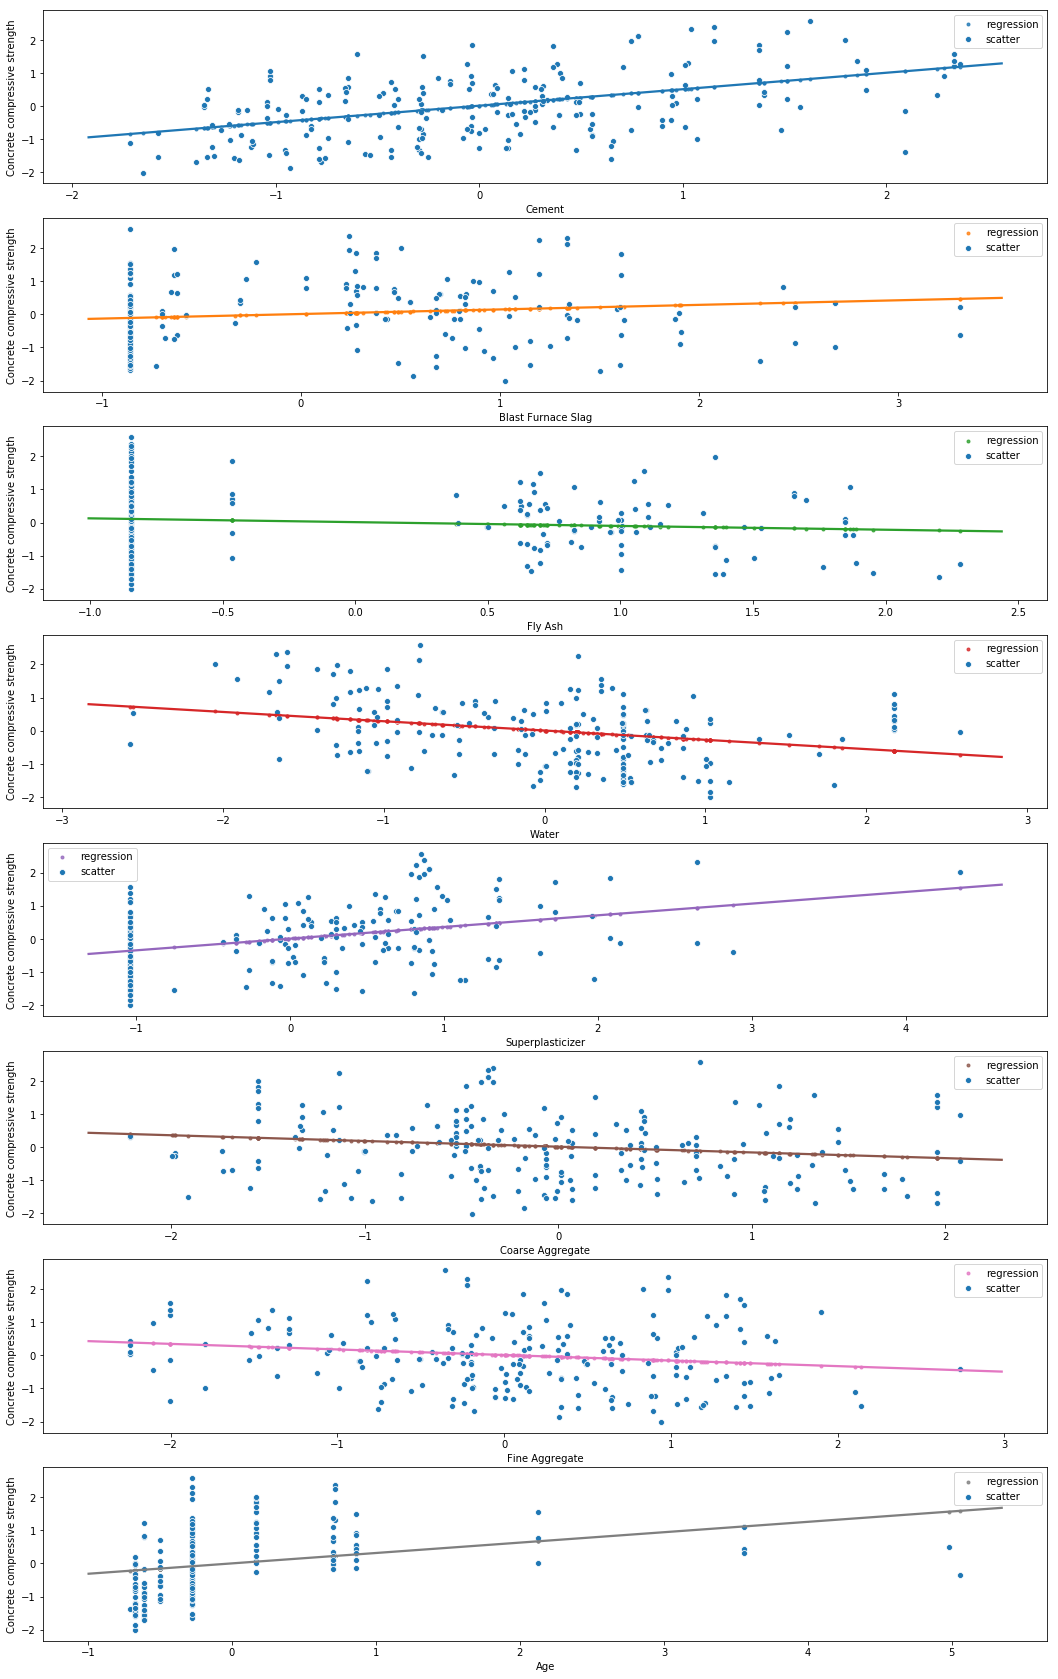

In [14]:
axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))


for i in range(0, inputNum):
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])
    
    #df2 = pd.concat([X_train, X_test, y_train, y_test], axis=1)
    Train = pd.concat([X_train, y_train], axis=1)
    Test = pd.concat([X_test, y_test], axis=1)
    
    


    ### simple linear regression by sklearn function

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train.iloc[:, i:i+1], y_train)
    y_pred_lm = reg1.predict(X_test.iloc[:, i:i+1])
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs    
    sns.regplot(x=Test.columns[i], y='y_pred_lm', 
                data=Test, ax=axes[i], label='regression', marker='.')
    sns.scatterplot(x=Test.columns[i], y='Concrete compressive strength', 
                    data=Test, ax=axes[i], label='scatter')


    #plt.plot(X_test, y_pred_lm, color='blue', linewidth=3)

    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = reg1.score(X_train.iloc[:, i:i+1], y_train)
    regResult.iloc[i, 2] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 3] = reg1.intercept_[0]
    regResult.iloc[i, 4] = reg1.coef_[0]
    regResult.assign()

    #plt.legend()
    #plt.show()


In [15]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.767486,0.253942,0.220568,0.0141947,[0.4969113379965024]
lm2,0.971405,0.0187516,0.0134745,0.0103498,[0.13809910757536797]
lm3,0.984932,0.0132803,-0.000262403,0.0119349,[-0.11457277338249787]
lm4,0.8842,0.0788784,0.102037,0.00600212,[-0.2804126132664281]
lm5,0.811311,0.123,0.176061,0.00801082,[0.3523493676762646]
lm6,0.971521,0.0299152,0.0133569,0.0120473,[-0.1726312072762147]
lm7,0.959382,0.028007,0.0256854,0.00860101,[-0.16790542571384914]
lm8,0.866687,0.1046,0.119823,0.00275111,[0.31358990778917284]


In [16]:
max(regResult['Cor']), max(regResult['R2'])

(0.2539415947677002, 0.2205678024330301)

## Problem 2
<a href="#ML-assignment-3">Top</a>
* Build own gradient descent function
* 現在只用第一個 attribute "Cement" 下去 train，可能要 train 3~5 分鐘

### Refresh Data

In [17]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [18]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns=df.columns)
df_normalized.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [19]:
#X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)

In [20]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
769,0.477065,-0.856888,-0.847144,0.488793,-1.039143,0.065380,0.641645,4.978487
261,-0.656431,-0.856888,0.722442,-1.038579,0.702626,0.397357,1.624960,-0.279733
535,1.070619,-0.856888,-0.847144,0.488793,-1.039143,-0.415858,0.149987,0.702224
169,1.376969,0.375755,-0.847144,-1.315006,1.724241,-1.554617,1.416567,0.718062
320,-0.307000,-0.856888,0.697428,-1.099487,1.104573,0.191480,1.440277,-0.501465


### Gradient Descent 

In [21]:
wName = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']

# Gradient Descent 
def descent3(X, y, dimension, w_current, learning_rate):
    w_gradient = np.zeros(dimension)
    N = float(X.shape[0])
    new_w = w_current
    for i in range(0, X.shape[0]):
        x_data = X.iloc[i]
        y_data = y.iloc[i]
        for j in range(1, X.shape[1]+1):
            error = (y_data[0] - (( w_current[j] * x_data[j-1]) + w_current[0]))
            w_gradient[0] += -(2/N) *error
            w_gradient[j] += -(2/N) *x_data[j-1] * error
    new_w -= w_gradient*learning_rate
    return new_w, w_gradient

def gd3(X, y, dimension, learning_rate=0.01, epochs=1000, stopThreshold = 0.000001):
    w_cur = np.random.uniform(-0.5,0.5,dimension)
    for i in range(epochs):
        w_cur, prev_gradient = descent3(X, y, dimension, w_cur, learning_rate)
        #print('w_cur:\n', w_cur, '\n----------\n')
        #print('step:\n', step, '\n----------\n')
        if all(abs(w_cur-prev_gradient) < stopThreshold):
            print('prev_grad:\n', prev_gradient, '\n----------\n')
            print("epoch: ", i)
            break
    return w_cur

In [22]:
# BB: Bias (w0)
# MM: Slope (w1)
#BB, MM = gd(X_train.iloc[:, 0:1], y_train)

In [33]:
w_finish0 = gd3(X_train.iloc[:, 0:1], y_train, 2)


In [39]:
w_finish0 = pd.DataFrame(w_finish0.reshape((1, 2)), columns=wName[0:2])
w_finish0

,w0,w1
0,0.014195,0.496911


In [40]:
BB, MM = w_finish0.iloc[0, 0:2]
BB, MM

(0.014194749249294458, 0.4969113379443408)

In [41]:
print(BB, MM)

0.014194749249294458 0.4969113379443408


### Prediction

In [42]:
#from sklearn.preprocessing import StandardScaler

# fit test data to our gd model
y_pred_gd = X_test.iloc[:, 0:1]*MM+BB
Test['y_pred_gd'] = X_test.iloc[:, 0:1]*MM+BB

### Plot the result

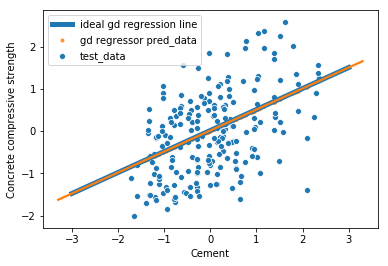

In [43]:
x1 = np.linspace(-3, 3, 5000)

sns.lineplot(x1, x1*MM + BB, label='ideal gd regression line', linewidth=5)
sns.regplot(x=Test.columns[0], y='y_pred_gd', 
                data=Test, label='gd regressor pred_data', marker='.')
sns.scatterplot(x=Test.columns[0], y='Concrete compressive strength', 
                data=Test, label='test_data')


In [44]:
# result
print(r2_score(y_test, y_pred_gd))

0.22056780247009478


In [45]:
regResult.loc['gd'] = mean_squared_error(y_test, y_pred_gd), 0, r2_score(y_test, y_pred_gd), BB, (np.array(MM))

In [46]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.767486,0.253942,0.220568,0.0141947,[0.4969113379965024]
lm2,0.971405,0.0187516,0.0134745,0.0103498,[0.13809910757536797]
lm3,0.984932,0.0132803,-0.000262403,0.0119349,[-0.11457277338249787]
lm4,0.8842,0.0788784,0.102037,0.00600212,[-0.2804126132664281]
lm5,0.811311,0.123,0.176061,0.00801082,[0.3523493676762646]
lm6,0.971521,0.0299152,0.0133569,0.0120473,[-0.1726312072762147]
lm7,0.959382,0.028007,0.0256854,0.00860101,[-0.16790542571384914]
lm8,0.866687,0.1046,0.119823,0.00275111,[0.31358990778917284]
gd,0.767486,0,0.220568,0.0141947,0.4969113379443408


## cf. Problem1 & Problem2
* 可看到每一項的都差不多(誤差在0.01的等級)
* 造成兩種方法數值誤差的可能性
    * 浮點運算誤差
    * 我們 Gradient Descenet 的 stopThreshold 設的比較小，可能提早跳出迴圈

In [47]:
regResult.loc[['lm1','gd']].assign()

,MSE,Cor,R2,bias,weight
lm1,0.767486,0.253942,0.220568,0.0141947,[0.4969113379965024]
gd,0.767486,0,0.220568,0.0141947,0.4969113379443408


### 這下面是 sklearn 的 Stochastic Gradient Descent Regressor
* 用全部 8 個 input attribute 下去 train，r2_score 可到 0.6

In [50]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)


/home/phua/anaconda3/envs/machine_learning/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [51]:
y_pred_sgd = clf.predict(X_test)

In [52]:
print('Coefficients (weight): ', clf.coef_)
print('\nIntercept (bias): ', clf.intercept_)
print('SGD Correlation: ', clf.score(X_train, y_train))
print('SGD R2-score: ', r2_score(y_test, y_pred_sgd))


Coefficients (weight):  [ 0.50679429  0.29231317  0.10311113 -0.35476092  0.12010653 -0.08599741
 -0.13040314  0.40965354]

Intercept (bias):  [0.00248136]
SGD Correlation:  0.6098380970942523
SGD R2-score:  0.5896546918791132


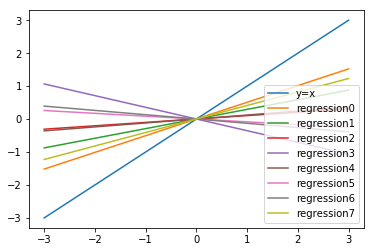

In [53]:
x1 = np.linspace(-3, 3, 5000)

plt.plot(x1, x1, label='y=x')
for i, c in enumerate(clf.coef_):
    plt.plot(x1, c*x1 + clf.intercept_, label='regression'+str(i))
plt.legend()
plt.show()

## Problem 3
<a href="#ML-assignment-3">Top</a>

In [77]:
wName = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8']

# Gradient Descent 
def descent3(X, y, dimension, w_current, learning_rate):
    w_gradient = np.zeros(dimension)
    N = float(X.shape[0])
    new_w = w_current
    for i in range(0, X.shape[0]):
        x_data = X.iloc[i]
        y_data = y.iloc[i]
        for j in range(1, X.shape[1]+1):
            error = (y_data[0] - (( w_current[j] * x_data[j-1]) + w_current[0]))
            w_gradient[0] += -(2/N) *error
            w_gradient[j] += -(2/N) *x_data[j-1] * error
    new_w -= w_gradient*learning_rate
    return new_w, w_gradient*learning_rate

def gd3(X, y, dimension, learning_rate=0.01, epochs=1000, stopThreshold = 0.000001):
    w_cur = np.random.uniform(-0.5,0.5,dimension)
    for i in range(epochs):
        w_cur, stepsize = descent3(X, y, dimension, w_cur, learning_rate)
        #print('w_cur:\n', w_cur, '\n----------\n')
        #print('step:\n', step, '\n----------\n')
        if all(abs(stepsize) < stopThreshold):
            print('prev_grad:\n', stepsize, '\n----------\n')
            print("epoch: ", i)
            break
    return w_cur

In [78]:
# use 8 attributes to train 
w_finish = gd3(X_train.iloc[:, :], y_train, 9)

prev_grad:
 [-6.99864916e-10 -4.53309042e-07  3.42854750e-07  5.93660638e-07
  1.01839484e-07 -9.97315473e-07  4.74341212e-07  6.22889697e-07
 -4.24125548e-07] 
----------

epoch:  467


In [79]:
w_finish = pd.DataFrame(w_finish.reshape((1, 9)), columns=wName)
w_finish

,w0,w1,w2,w3,w4,w5,w6,w7,w8
0,0.009237,0.496844,0.138109,-0.114486,-0.280368,0.352295,-0.172566,-0.167872,0.313441


### Prediction

In [82]:
w_finish

,w0,w1,w2,w3,w4,w5,w6,w7,w8
0,0.009237,0.496844,0.138109,-0.114486,-0.280368,0.352295,-0.172566,-0.167872,0.313441


In [81]:
builtin = pd.DataFrame(clf.intercept_)
builtin = pd.concat([builtin, pd.DataFrame(clf.coef_.reshape(1,-1))], axis=1)
builtin

,0,0,1,2,3,4,5,6,7
0,0.002481,0.506794,0.292313,0.103111,-0.354761,0.120107,-0.085997,-0.130403,0.409654


In [63]:
X_test2=Test.iloc[:, 0:8].copy()

In [64]:
# w1X1, w2X2, ... , w8X8
for i in range(8):
    X_test2.iloc[:, i] *= w_finish.iloc[0, i+1]

In [65]:
# fit test data to our gd model

# (w1X1 + w2X2 + ... + w8X8) + w0
y_pred_gd3 = X_test2.sum(axis=1) + w_finish.iloc[0, 0]

Test['y_pred_gd3'] = y_pred_gd3

regResult.loc['gd3'] = mean_squared_error(y_test, y_pred_gd3), 0, r2_score(y_test, y_pred_gd3), \
                        w_finish.iloc[0, 0], 0
regResult.iloc[9, 4] = np.array(w_finish.iloc[0, 1:9])

In [66]:
w_finish

,w0,w1,w2,w3,w4,w5,w6,w7,w8
0,0.009237,0.496865,0.138092,-0.114515,-0.280373,0.352344,-0.172589,-0.167902,0.313461


In [67]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.767486,0.253942,0.220568,0.0141947,[0.4969113379965024]
lm2,0.971405,0.0187516,0.0134745,0.0103498,[0.13809910757536797]
lm3,0.984932,0.0132803,-0.000262403,0.0119349,[-0.11457277338249787]
lm4,0.8842,0.0788784,0.102037,0.00600212,[-0.2804126132664281]
lm5,0.811311,0.123,0.176061,0.00801082,[0.3523493676762646]
lm6,0.971521,0.0299152,0.0133569,0.0120473,[-0.1726312072762147]
lm7,0.959382,0.028007,0.0256854,0.00860101,[-0.16790542571384914]
lm8,0.866687,0.1046,0.119823,0.00275111,[0.31358990778917284]
gd,0.767486,0,0.220568,0.0141947,0.4969113379443408
gd3,0.48427,0,0.508192,0.00923657,"[0.49686523054482656, 0.13809155971100753, -0...."


## Problem 4

In [1314]:
X_test3.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
877,0.048900,-0.083701,-0.040178,-0.498905,0.214107,0.250025,-0.010779,-0.094742
733,0.223634,-0.083701,0.041226,-0.131995,-0.277032,-0.134956,-0.086387,-0.094742
437,-0.354967,-0.026953,-0.090770,0.212141,0.013187,-0.054061,-0.048583,-0.094742
149,0.474196,0.036704,0.041226,0.355109,0.459677,0.196257,-0.276869,0.055454
183,0.187039,0.130377,0.041226,0.084355,0.147134,0.045839,0.043366,0.243199


In [1745]:
X_test3 = Test.iloc[:, 0:8].copy()
X_test3['Cement2']=X_test3.iloc[:, 1]*abs(X_test3.iloc[:, 0])

for i in range(8):
    X_test3.iloc[:, i] *= w_finish.iloc[0, i+1]
X_test3.iloc[:, 8] *= w_finish.iloc[0, 2]    
X_test3.iloc[:, 0] *=0.97
X_test3.iloc[:, 1] *=1.49
X_test3.iloc[:, 2] *=0.47
X_test3.iloc[:, 3] *=1.33
X_test3.iloc[:, 4] *=0.75
X_test3.iloc[:, 5] *=0.45
X_test3.iloc[:, 6] *=0.73
X_test3.iloc[:, 7] *=1.39
X_test3.iloc[:, 8] *=0.2

In [1746]:
y_pred_gd4 = X_test3.sum(axis=1) + w_finish.iloc[0, 0]

In [1747]:
Test['y_pred_gd4'] = y_pred_gd4

regResult.loc['gd4'] = mean_squared_error(y_test, y_pred_gd4), 0, r2_score(y_test, y_pred_gd4), \
                        w_finish.iloc[0, 0], 0
regResult.iloc[9, 4] = np.array(w_finish.iloc[0, 1:9])

In [1748]:
regResult

,MSE,Cor,R2,bias,weight
lm1,0.754151,0.233075,0.296624,0.00350462,[0.47664652597298873]
lm2,1.04171,0.0134585,0.0284285,0.0167231,[0.11572046665228662]
lm3,1.04744,0.00488868,0.0230845,0.0141998,[-0.06943779151196255]
lm4,0.983232,0.0829314,0.0829669,0.0102941,[-0.28347108551771816]
lm5,0.940803,0.13585,0.122539,0.0148196,[0.35974880485302596]
lm6,1.10263,0.039612,-0.0283896,0.0169326,[-0.19725026178931523]
lm7,1.02608,0.0218439,0.0430056,0.0161554,[-0.14559005329950694]
lm8,0.9399,0.102178,0.123381,0.00788969,[0.30473065266499966]
gd,0.754162,0,0.296614,0.00351507,0.4765979895973408
gd3,0.390629,0,0.635671,0.0223438,"[0.49196707067363843, 0.13954283212613, -0.121..."
